# Tutorial 1: Differentiation and Integration
**Week 2, Day 3: Calculus**

**This tutorial is modified from Neuromatch Academy**

The original code can be found in the following link:(https://colab.research.google.com/github/NeuromatchAcademy/precourse/blob/main/tutorials/W0D4_Calculus/student/W0D4_Tutorial1.ipynb)

__Content creators:__ John S Butler, Arvind Kumar with help from Ella Batty

__Content reviewers:__  Aderogba Bayo, Tessy Tom, Matt McCann

__Production editors:__ Matthew McCann, Ella Batty

**Our 2022 Sponsor:**

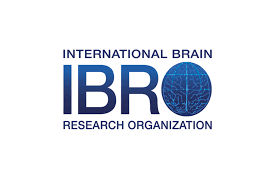

---
# Tutorial Objectives

*Estimated timing of tutorial: 80 minutes*

In this tutorial, we will cover aspects of calculus that will be frequently used in the main NMA course. We assume that you have some familiarty with calculus, but may be a bit rusty or may not have done much practice.  Specifically, the objectives of this tutorial are:

*   Get an intuitive understanding of derivative and integration operations
*   Learn to calculate the derivatives of 1- and 2-dimensional functions/signals numerically
*   Familiarize with the concept of neuron transfer function in 1- and 2-dimensions.
*   Familiarize with the idea of numerical integration using Riemann sum





  If you want a vidio explanation of (Why do we care about calculus?) from Neuromarch academy , check this link : (https://youtube.com/watch?v=NZwfH_dG2wI)

---
# Setup

In [ ]:
# @title Install dependencies
!pip install sympy --quiet

In [ ]:
# Imports

import numpy as np
import scipy.optimize as opt  # import root-finding algorithm
import sympy as sp  # Python toolbox for symbolic maths
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Toolbox for rendring 3D figures
from mpl_toolkits import mplot3d  # Toolbox for rendring 3D figures

In [ ]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display
from ipywidgets import interact
%config InlineBackend.figure_format = 'retina'
# use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")
my_layout = widgets.Layout()

fig_w, fig_h = 12, 4.5
my_fontsize = 16
my_params = {'axes.labelsize': my_fontsize,
          'axes.titlesize': my_fontsize,
          'figure.figsize': [fig_w, fig_h],
          'font.size': my_fontsize,
          'legend.fontsize': my_fontsize-4,
          'lines.markersize': 8.,
          'lines.linewidth': 2.,
          'xtick.labelsize': my_fontsize-2,
          'ytick.labelsize': my_fontsize-2}

plt.rcParams.update(my_params)

In [ ]:
# @title Plotting Functions
def move_sympyplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
    backend.process_series()
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)


def plot_functions(function, show_derivative, show_integral):

  # For sympy we first define our symbolic variable
  x, y, z, t, f = sp.symbols('x y z t f')

  # We define our function
  if function == 'Linear':
    f = -2*t
    name = r'$-2t$'
  elif function == 'Parabolic':
    f =  t**2
    name = r'$t^2$'
  elif function == 'Exponential':
    f =  sp.exp(t)
    name = r'$e^t$'
  elif function == 'Sine':
    f =  sp.sin(t)
    name = r'$sin(t)$'
  elif function == 'Sigmoid':
    f = 1/(1 + sp.exp(-(t-5)))
    name = r'$\frac{1}{1+e^{-(t-5)}}$'

  if show_derivative and not show_integral:
    # Calculate the derivative of sin(t) as a function of t
    diff_f = sp.diff(f)
    print('Derivative of', f, 'is ', diff_f)

    p1 = sp.plot(f, diff_f, show=False)
    p1[0].line_color='r'
    p1[1].line_color='b'
    p1[0].label='Function'
    p1[1].label='Derivative'
    p1.legend=True
    p1.title = 'Function = ' + name + '\n'
    p1.show()
  elif show_integral and not show_derivative:

    int_f = sp.integrate(f)
    int_f = int_f - int_f.subs(t, -10)
    print('Integral of', f, 'is ', int_f)


    p1 = sp.plot(f, int_f, show=False)
    p1[0].line_color='r'
    p1[1].line_color='g'
    p1[0].label='Function'
    p1[1].label='Integral'
    p1.legend=True
    p1.title = 'Function = ' + name + '\n'
    p1.show()


  elif show_integral and show_derivative:

    diff_f = sp.diff(f)
    print('Derivative of', f, 'is ', diff_f)

    int_f = sp.integrate(f)
    int_f = int_f - int_f.subs(t, -10)
    print('Integral of', f, 'is ', int_f)

    p1 = sp.plot(f, diff_f, int_f, show=False)
    p1[0].line_color='r'
    p1[1].line_color='b'
    p1[2].line_color='g'
    p1[0].label='Function'
    p1[1].label='Derivative'
    p1[2].label='Integral'
    p1.legend=True
    p1.title = 'Function = ' + name + '\n'
    p1.show()

  else:

    p1 = sp.plot(f, show=False)
    p1[0].line_color='r'
    p1[0].label='Function'
    p1.legend=True
    p1.title = 'Function = ' + name + '\n'
    p1.show()


def plot_alpha_func(t, f, df_dt):

  plt.figure()
  plt.subplot(2,1,1)
  plt.plot(t, f, 'r', label='Alpha function')
  plt.xlabel('Time (au)')
  plt.ylabel('Voltage')
  plt.title('Alpha function (f(t))')
  #plt.legend()

  plt.subplot(2,1,2)
  plt.plot(t, df_dt, 'b', label='Derivative')
  plt.title('Derivative of alpha function')
  plt.xlabel('Time (au)')
  plt.ylabel('df/dt')
  #plt.legend()


def plot_charge_transfer(t, PSP, numerical_integral):

  fig, axes = plt.subplots(1, 2)

  axes[0].plot(t, PSP)
  axes[0].set(xlabel = 't', ylabel = 'PSP')

  axes[1].plot(t, numerical_integral)
  axes[1].set(xlabel = 't', ylabel = 'Charge Transferred')

---
# Section 1: What is differentiation and integration?


If you want a video explanation of (A geometrical interpretation of differentiation and integration) from Neuromatch Academy, check this link:(https://youtube.com/watch?v=uQjwr9RQaEs)

This video covers the definition of differentiation and integration, highlights the geometrical interpretation of each, and introduces the idea of eigenfunctions.

<details>
<summary> <font color='blue'>Click here for text recap of video </font></summary>

Calculus is a part of mathematics concerned with **continous change**. There are two branches of calculus: differential calculus and integral calculus. 

Differentiation of a function $f(t)$ gives you the derivative of that function $\frac{d(f(t))}{dt}$. A derivative captures how sensitive a function is to slight changes in the input for different ranges of inputs. Geometrically, the derivative of a function at a certain input is the slope of the function at that input. For example, as you drive, the distance traveled changes continuously with time. The derivative of the distance traveled with respect to time is the velocity of the vehicle at each point in time. The velocity tells you the rate of change of the distance traveled at different points in time. If you have slow velocity (a small derivative), the distance traveled doesn't change much for small changes in time. A high velocity (big derivative) means that the distance traveled changes a lot for small changes in time.

The sign of the derivative of a function (or signal) tells whether the signal is increasing or decreasing. For a signal going through changes as a function of time, the derivative will become zero when the signal changes its direction of change (e.g. from increasing to decreasing). That is, at local minimum or maximum values, the slope of the signal will be zero. This property is used in optimizing problems. But we can also use it to find peaks in a signal. 

Integration can be thought of as the reverse of differentation. If we integrate the velocity with respect to time, we can calculate the distance traveled. By integrating a function, we are basically trying to find functions that would have the original one as their derivative. When we integrate a function, our integral will have an added unknown scalar constant, $C$. 
For example, if

\begin{equation}
g(t) = 1.5t^2 + 4t - 1
\end{equation}

our integral function $f(t)$ will be:

\begin{equation}
f(t) = \int g(t) dt = 0.5t^3 + 2t^2 - t + C
\end{equation}

This constant exists because the derivative of a constant is 0 so we cannot know what the constant should be. This is an indefinite integral. If we compute a definite integral, that is the integral between two limits of the input, we will not have this unknown constant and the integral of a function will capture the area under the curve of that function between those two limits.
</details>

### Interactive Demo 1: Geometrical understanding

In the interactive demo below, you can pick different functions to examine in the drop down menu. You can then choose to show the derivative function and/or the integral function. 

For the integral, we have chosen the unknown constant $C$ such that the integral function at the left x-axis limit is $0$, as $f(t = -10) = 0$. So the integral will reflect the area under the curve starting from that position.

For each function:

* Examine just the function first. Discuss and predict what the derivative and integral will look like. Remember that derivative = slope of function, integral = area under curve from $t = -10$ to that t.
* Check the derivative - does it match your expectations?
* Check the integral - does it match your expectations?

In [ ]:
# @markdown Execute this cell to enable the widget
function_options = widgets.Dropdown(
    options=['Linear', 'Exponential', 'Sine', 'Sigmoid'],
    description='Function',
    disabled=False,
)

derivative = widgets.Checkbox(
    value=False,
    description='Show derivative',
    disabled=False,
    indent=False
)

integral = widgets.Checkbox(
    value=False,
    description='Show integral',
    disabled=False,
    indent=False
)

def on_value_change(change):
    derivative.value = False
    integral.value = False

function_options.observe(on_value_change, names='value')

interact(plot_functions, function = function_options, show_derivative = derivative, show_integral = integral);

In the demo above you may have noticed that the derivative and integral of the exponential function is same as the exponential function itself.

Some functions like the exponential function, when differentiated or integrated, equal a scalar times the same function. This is a similar idea to eigenvectors of a matrix being those that, when multipled by the matrix, equal a scalar times themselves, as you saw yesterday!

When 

\begin{equation}
\frac{d(f(t)}{dt} = a \cdot f(t)\text{,}
\end{equation}

we say that $f(t)$ is an **eigenfunction** for derivative operator, where $a$ is a scaling factor. Similarly, when 

\begin{equation}
\int f(t)dt = a \cdot f(t)\text{,} 
\end{equation}

we say that $f(t)$ is an **eigenfunction** for integral operator.

As you can imagine, working with eigenfunctions can make mathematical analysis easy.

---
# Section 2: Analytical & Numerical Differentiation

If You want a video explanation of (Differentiation) from Neuromatch Academy, check this link : (https://youtube.com/watch?v=sHogZISXGuQ)


In this section, we will delve into how we actually find the derivative of a function, both analytically and numerically.


## Section 2.1: Analytical Differentiation

*Estimated timing to here from start of tutorial: 20 min*

When we find the derivative analytically, we are finding the exact formula for the derivative function. 

To do this, instead of having to do some fancy math every time, we can often consult [an online resource](https://en.wikipedia.org/wiki/Differentiation_rules) for a list of common derivatives, in this case our trusty friend Wikipedia.

If I told you to find the derivative of $f(t) = t^3$, you could consult that site and find in Section 2.1, that if $f(t) = t^n$, then $\frac{d(f(t))}{dt} = nt^{n-1}$. So you would be able to tell me that the derivative of $f(t) = t^3$ is $\frac{d(f(t))}{dt} = 3t^{2}$.

This list of common derivatives often contains only very simple functions. Luckily, as we'll see in the next two sections, we can often break the derivative of a complex function down into the derivatives of more simple components.

### Section 2.1.1: Product Rule

Sometimes we encounter functions which are the product of two functions that both depend on the variable. 
How do we take the derivative of such functions? For this we use the [Product Rule](https://en.wikipedia.org/wiki/Product_rule).

\begin{align}
f(t) &= u(t)\cdot v(t) \\
\frac{d(f(t))}{dt} &= v\cdot \frac{du}{dt} + u\cdot \frac{dv}{dt}
\end{align}

#### Coding Exercise 2.1.1: Derivative of the postsynaptic potential alpha function 

Let's use the product rule to get the derivative of the post-synaptic potential alpha function. As we saw in Video 3, the shape of the postsynaptic potential is given by the so called alpha function:

\begin{equation}
f(t) = t \cdot \text{exp}\left( -\frac{t}{\tau} \right)
\end{equation}

Here $f(t)$ is a product of $t$ and $\text{exp} \left(-\frac{t}{\tau} \right)$. So we can have $u(t) = t$ and $v(t) = \text{exp} \left( -\frac{t}{\tau} \right)$ and use the product rule! 

We have defined $u(t)$ and $v(t)$ in the code below, in terms of the variable $t$ which is an array of time steps from 0 to 10. Define $\frac{du}{dt}$ and $\frac{dv}{dt}$, the compute the full derivative of the alpha function using the product rule. You can always consult wikipedia to figure out $\frac{du}{dt}$ and $\frac{dv}{dt}$!

In [ ]:
########################################################################
## TODO for students
## Complete all ... in code below and remove
raise NotImplementedError("Calculate the derivatives")
########################################################################

# Define time, time constant
t = np.arange(0, 10, .1)
tau = 0.5

# Compute alpha function
f = t * np.exp(-t/tau)

# Define u(t), v(t)
u_t = t
v_t = np.exp(-t/tau)

# Define du/dt, dv/dt
du_dt = ...
dv_dt = ...

# Define full derivative
df_dt = ...

# Visualize
plot_alpha_func(t, f, df_dt)

[*Click for solution*](https://github.com/NeuromatchAcademy/precourse/tree/main//tutorials/W0D4_Calculus/solutions/W0D4_Tutorial1_Solution_636667ff.py)

*Example output:*

<img alt='Solution hint' align='left' width=1687.0 height=607.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/precourse/main/tutorials/W0D4_Calculus/static/W0D4_Tutorial1_Solution_636667ff_0.png>



### Section 2.1.2: Chain Rule

Many times we encounter situations in which the variable $a$ is changing with time ($t$) and affecting another variable $r$. How can we estimate the derivative of $r$ with respect to $a$ i.e. $\frac{dr}{da} = ?$

To calculate $\frac{dr}{da}$ we use the [Chain Rule](https://en.wikipedia.org/wiki/Chain_rule).

\begin{equation}
\frac{dr}{da} = \frac{dr}{dt}\cdot\frac{dt}{da}
\end{equation}

That is, we calculate the derivative of both variables with respect to t and divide that derivative of $r$ by that  derivative of $a$. 

We can also use this formula to simplify taking derivatives of complex functions! We can make an arbitrary function t so that we can compute more simple derivatives and multiply, as we will see in this exercise.

#### Math Exercise 2.1.2: Chain Rule

Let's say that:

\begin{equation}
r(a) = e^{a^4 + 1}
\end{equation}

What is $\frac{dr}{da}$? This is a more complex function so we can't simply consult a table of common derivatives. Can you use the chain rule to help?

**Hint:** we didn't define t but you could set t equal to the function in the exponent.

[*Click for solution*](https://github.com/NeuromatchAcademy/precourse/tree/main//tutorials/W0D4_Calculus/solutions/W0D4_Tutorial1_Solution_a0e42694.py)



### Section 2.2.3: Derivatives in Python using SymPy

There is a useful Python library for getting the analytical derivatives of functions: SymPy. We actually used this in Interactive Demo 1, under the hood.

See the following cell for an example of setting up a sympy function and finding the derivative.

In [ ]:
# For sympy we first define our symbolic variables
f, t = sp.symbols('f, t')

# Function definition (sigmoid)
f = 1/(1 + sp.exp(-(t-5)))

# Get the derivative
diff_f = sp.diff(f)

# Print the resulting function
print('Derivative of', f, 'is ', diff_f)